In [2]:
%pip install tensorflow

ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\jaygr\AppData\Local\Programs\Python\Python38\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Users\jaygr\AppData\Local\Programs\Python\Python38\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "c:\Users\jaygr\AppData\Local\Programs\Python\Python38\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "c:\Users\jaygr\AppData\Local\Programs\Python\Python38\lib\http\client.py", line 455, in read
    n = self.readinto(b)
  File "c:\Users\jaygr\AppData\Local\Programs\Python\Python38\lib\http\client.py", line 499, in readinto
    n = self.fp.readinto(b)
  File "c:\Users\jaygr\AppData\Local\Programs\Python\Python38\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "c:\Users\jaygr\AppData\Local\Progra


  Using cached tensorflow-2.13.1-cp38-cp38-win_amd64.whl (1.9 kB)
  Using cached tensorflow-2.13.0-cp38-cp38-win_amd64.whl (1.9 kB)


In [6]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\jaygr\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


1/1 [==============================] - 1s 1s/step
hr [[6.5730426e-08 1.3867816e-06 3.3792895e-07 3.8394861e-09 5.6322370e-11
  3.8326976e-12 9.9919566e-09 4.6310662e-09 2.2819515e-09 3.5083009e-10
  1.6416409e-10 9.9995089e-01 2.8876053e-05 1.8225841e-06 1.5632331e-05
  1.3332278e-13 5.4183968e-09 2.5689060e-11 5.3238720e-09 1.1170936e-10
  3.1209641e-08 1.8909511e-11 3.6650483e-12 1.6716792e-08 2.0837391e-11
  4.3297532e-10 4.2482950e-09 1.5524257e-10 1.3564594e-09 2.9016147e-07
  6.0675447e-08 4.2960812e-11 5.3191070e-07 2.0943629e-10 9.4099548e-08
  1.2739619e-13 1.9051422e-11 4.5247126e-12]]
Grape___Black_rot


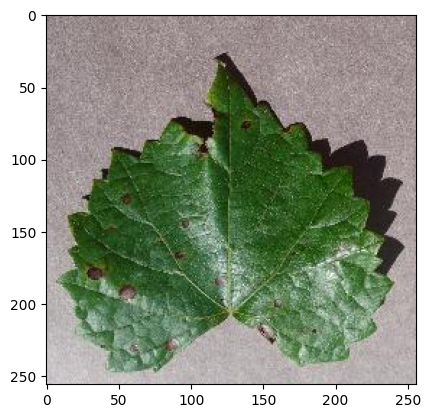

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
import tensorflow as tf

def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

def perform_inference(model_path, image_path):
    classes = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']  # Define your classes here
    keras_model = tf.keras.models.load_model(model_path)

    result = keras_model.predict([prepare(image_path)])

    disease = image.load_img(image_path)
    plt.imshow(disease)
    print("hr", result)

    class_result = np.argmax(result, axis=1)
    print(classes[class_result[0]])

if __name__ == "__main__":
    model_path = "plantdiseasemobilenet8epoch.h5"
    image_path = "rot.jpg"
    perform_inference(model_path, image_path)
